## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [2]:
df = pd.read_csv('data/banned_book_data_combined_lists.csv')

In [3]:
df.head()

,publication,author,date,year,month,day,reason,state_arc
0,[ARABIC LANGUAGE CHARACTERS].,NaN,2019-12-18 00:00:00,2019.0,12.0,18.0,NaN,fl
1,[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.,NaN,2021-09-09 00:00:00,2021.0,9.0,9.0,NaN,fl
2,[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
3,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
4,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl


In [4]:
df.columns

Index(['publication', 'author', 'date', 'year', 'month', 'day', 'reason',
       'state_arc'],
      dtype='object')

### About the Columns
- publication - Title of the book
- author - Author
- date - Date the book was banned
- year - Integer year book was banned
- month - Integer month book was banned
- day - Integer day book was banned
- reason - Justification provided by the relevant Department of Corrections for banning the book
- state - State postal code

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48376 entries, 0 to 48375
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   publication  48376 non-null  object 
 1   author       16639 non-null  object 
 2   date         40750 non-null  object 
 3   year         40778 non-null  float64
 4   month        40750 non-null  float64
 5   day          40366 non-null  float64
 6   reason       23350 non-null  object 
 7   state_arc    48376 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.0+ MB


In [6]:
# many nulls in 'author' & 'reason'

In [7]:
# which states?
df.state_arc.value_counts()

fl    20202
tx     9396
az     4632
va     2553
wi     2281
or     1780
ct     1659
sc     1509
ca     1424
mi      974
nc      600
ia      431
mt      374
nj      232
il      134
ks       99
ri       68
ga       28
Name: state_arc, dtype: int64

## EDA

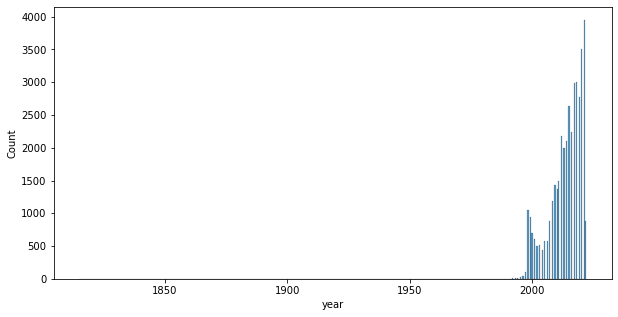

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='year', ax=ax);

Text(0.5, 1.0, 'Number of Banned Books per State')

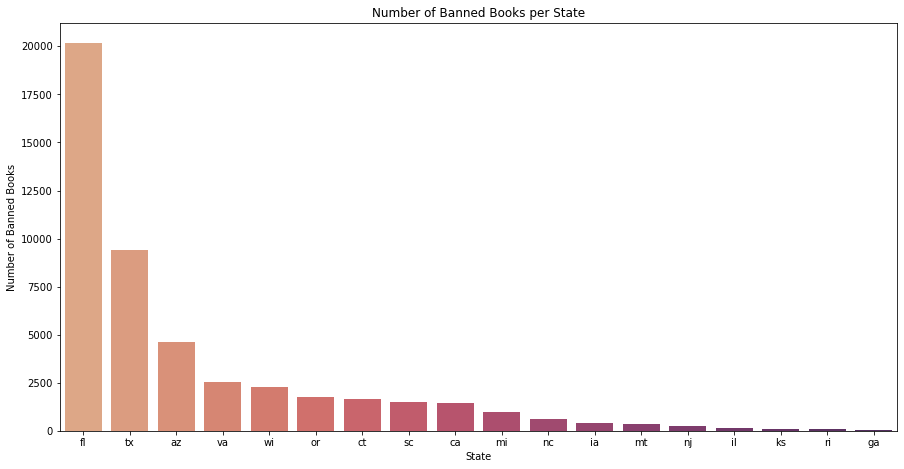

In [9]:
num_books_per_state = pd.DataFrame(df.state_arc.value_counts())

num_books_per_state = num_books_per_state.rename(columns={'state_arc' : 'state_total'})
fig, ax = plt.subplots(figsize=(15,7.5))
sns.barplot(x=num_books_per_state.index, y=num_books_per_state.state_total, palette='flare')
ax.set_ylabel('Number of Banned Books')
ax.set_xlabel('State')
ax.set_title('Number of Banned Books per State')

In [10]:
num_books_per_state.columns

Index(['state_total'], dtype='object')

In [11]:
num_books_per_state

,state_total
fl,20202
tx,9396
az,4632
va,2553
wi,2281
or,1780
ct,1659
sc,1509
ca,1424
mi,974


In [12]:
df.author.value_counts().head(31)


NONE                       452
ENNIS, GARTH                46
Zane                        29
Penthouse International     27
GAIMAN, NEIL                27
CHIA, MANTAK                26
GHOST                       24
OKAYADO                     24
VAUGHAN, BRIAN              24
Silk White                  24
NATIONAL GEOGRAPHIC         23
RAND MCNALLY                23
ROYO, LUIS                  23
editors of Penthouse        20
Anonymous                   20
KOIKE, KAZUO                20
MOORE, ALAN                 19
ANONYMOUS                   19
ASHLEY & JAQUAVIS           19
TAMAKI, NOZOMU              19
MIURA, KENTARO              17
FENNER, CATHY               17
Tranay Adams                16
PATTERSON, JAMES            16
GREENE, ROBERT              16
Ken Akamatsu                16
Mike Enemigo                15
Jim Balent                  15
BRUBAKER, ED                15
Ghost                       15
Taschen                     15
Name: author, dtype: int64

In [13]:
# Neil Gaiman's works on the list
df[ df['author'] == 'GAIMAN, NEIL']['publication']

29899                         AMERICAN GODS SHADOWS BK1
29900                        AMERICAN GODS V2 MY AINSEL
30099                          ART OF BRYAN TALBOT, THE
30509                    BEST AMERICAN COMICS 2010, THE
30713                                      BLACK ORCHID
31367    COMICAL TRAGEDY OR TRAGICAL COMEDY OF MR PUNCH
31841                         DEATH: THE DELUXE EDITION
32120                                       DREAMING #1
32498    FACTS IN THE CASE OF THE DEPARTURE OF MISS FIN
34599                   LUCIFER: THE INFERNAL COMEDY #1
34965                MIDNIGHT DAYS - THE DELUXE EDITION
36120                  PROBLEM OF SUSAN & OTHER STORIES
36577                             SANDMAN BOOK ONE, THE
36578                             SANDMAN BOOK TWO, THE
36579                       SANDMAN ENDLESS NIGHTS, THE
36581                           SANDMAN OMNIBUS V2, THE
36582              SANDMAN OVERTURE DELUXE EDITION, THE
36583              SANDMAN V1 PRELUDES & NOCTURN

In [14]:
# Neil Gaiman's works on the list
df[ df['author'] == 'GAIMAN, NEIL'][['publication', 'reason']]

,publication,reason
29899,AMERICAN GODS SHADOWS BK1,"PGS 27, 28, 59, 126, 139 & 170 SEXUALLY EXPLIC..."
29900,AMERICAN GODS V2 MY AINSEL,"PAGES 29, 80 & 108 CONTAIN SEXUALLY EXPLICIT I..."
30099,"ART OF BRYAN TALBOT, THE","PAGES 17, 28, 29, 32, 52 & 58 SEI"
30509,"BEST AMERICAN COMICS 2010, THE","PGS 182, 185, 186 & 187 SEXUALLY EXPLICIT IMAGES"
30713,BLACK ORCHID,"PGS 27, 28, 32, 40, 66 & 109 SEXUALLY EXPLICIT..."
31367,COMICAL TRAGEDY OR TRAGICAL COMEDY OF MR PUNCH,PGS 27 & 29 SEXUALLY EXPLICIT IMAGES
31841,DEATH: THE DELUXE EDITION,PG 243 SEXUALLY EXPLICIT IMAGE
32120,DREAMING #1,"PGS 74, 156 & 157 SEXUALLY EXPLICIT IMAGES"
32498,FACTS IN THE CASE OF THE DEPARTURE OF MISS FIN,PAGE: 38 SEI
34599,LUCIFER: THE INFERNAL COMEDY #1,PGS 30 & 93 SEXUALLY EXPLICIT IMAGES


In [15]:
#Robert Greene's works on the list
df[ df['author'] == 'GREENE, ROBERT']['publication']

30165                           ART OF SEDUCTION
31461              CONCISE ART OF SEDUCTION, THE
31463          CONCISE LAWS OF HUMAN NATURE, THE
31465          CONCISE 33 STRATEGIES OF WAR, THE
31466              CONCISE 48 LAWS OF POWER, THE
31672                            DAILY LAWS, THE
33238                                      HAIRY
34315                       LAWS OF HUMAN NATURE
37379               SUMMARY THE ART OF SEDUCTION
37380           SUMMARY THE LAWS OF HUMAN NATURE
37381               SUMMARY THE 48 LAWS OF POWER
38613       WORKBOOK ON THE LAWS OF HUMAN NATURE
38898                       33 STRATEGIES OF WAR
38910    48 LAWS OF POWER NEW SUMMARY & ANALYSIS
38911                      48 LAWS OF POWER, THE
38921                              50TH LAW, THE
Name: publication, dtype: object

In [16]:
#Robert Greene's works on the list
df[ df['author'] == 'GREENE, ROBERT'][['publication', 'reason']]

,publication,reason
30165,ART OF SEDUCTION,ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
31461,"CONCISE ART OF SEDUCTION, THE",ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
31463,"CONCISE LAWS OF HUMAN NATURE, THE",NTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
31465,"CONCISE 33 STRATEGIES OF WAR, THE",ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
31466,"CONCISE 48 LAWS OF POWER, THE",ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
31672,"DAILY LAWS, THE",ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
33238,HAIRY,PAGES 11 & 37 SEXUALLY EXPLICIT IMAGES
34315,LAWS OF HUMAN NATURE,ENTIRE BOOK CONTAINS DECEPTION & MANIPULATION ...
37379,SUMMARY THE ART OF SEDUCTION,ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES
37380,SUMMARY THE LAWS OF HUMAN NATURE,ENTIRE BOOK CONTAINS MANIPULATION TECHNIQUES W...


In [17]:
df.head()

,publication,author,date,year,month,day,reason,state_arc
0,[ARABIC LANGUAGE CHARACTERS].,NaN,2019-12-18 00:00:00,2019.0,12.0,18.0,NaN,fl
1,[ARABIC LANGUAGE CHARACTERS]. TAJWEED QURAN.,NaN,2021-09-09 00:00:00,2021.0,9.0,9.0,NaN,fl
2,[KOREAN LANGUAGE CHARACTERS] HOLY SPIRIT LOVE.,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
3,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl
4,[KOREAN LANGUAGE CHARACTERS].,NaN,2021-02-25 00:00:00,2021.0,2.0,25.0,NaN,fl


AttributeError: 'numpy.ndarray' object has no attribute 'set_ylabel'

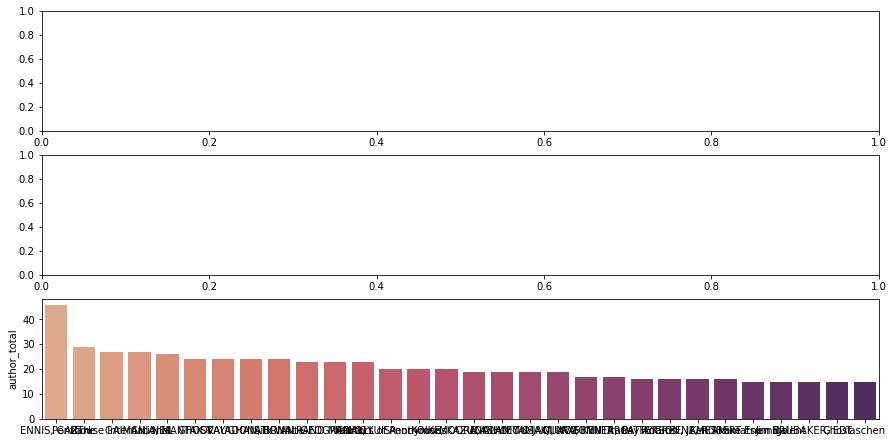

In [28]:
num_books_per_author = pd.DataFrame(df.author.value_counts())

num_books_per_author = num_books_per_author.rename(columns={'author' : 'author_total'})
fig, ax = plt.subplots(3, figsize=(15,7.5))
sns.barplot(x=num_books_per_author[1:31].index, y=num_books_per_author[1:31].author_total, palette='flare')
ax.set_ylabel('Number of Banned Books')
ax.set_xlabel('Author')
ax.set_title('Number of Banned Books per Author')

In [22]:
num_books_per_author[1:31]

,author_total
"ENNIS, GARTH",46
Zane,29
Penthouse International,27
"GAIMAN, NEIL",27
"CHIA, MANTAK",26
GHOST,24
OKAYADO,24
"VAUGHAN, BRIAN",24
Silk White,24
NATIONAL GEOGRAPHIC,23
